In [1]:
import matplotlib.pyplot as plt
import arviz as az
from pystan import StanModel
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
model_code = """
    data {
      real Y [10];
    }
    parameters {
      real mu;
      real<lower=0> sigma;
    }
    model {
      for (i in 1:10) {
            Y[i] ~ normal(mu,sigma);
        }
    mu ~ normal(1.5,0.1);
    sigma ~ gamma(1,1);
    }
"""

In [3]:
# fake data
data = dict(Y=np.random.normal(1.5,0.2,10))
data

{'Y': array([1.48402836, 1.36709329, 1.66390322, 1.66461985, 1.43178253,
        1.65555258, 1.22950389, 1.56135915, 1.33611608, 1.71921843])}

In [4]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c69f4509966370ace0b838ee0f548f57 NOW.


In [5]:
fit = sm.sampling(data=data,iter=200,chains=4)

In [6]:
summary_dict = fit.summary()

In [7]:
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

In [8]:
df

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
mu,1.508152,0.001909,0.044051,1.423210,1.477781,1.507074,1.532416,1.598682,532.358468,0.998555
sigma,0.185143,0.005453,0.046260,0.122576,0.151411,0.174034,0.206981,0.311783,71.976204,1.058561
lp__,10.575187,0.072700,0.864616,8.196652,10.279150,10.857035,11.192483,11.409995,141.442683,1.012819


In [9]:
fit.stansummary().split("\n")

['Inference for Stan model: anon_model_c69f4509966370ace0b838ee0f548f57.',
 '4 chains, each with iter=200; warmup=100; thin=1; ',
 'post-warmup draws per chain=100, total post-warmup draws=400.',
 '',
 '        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat',
 'mu      1.51  1.9e-3   0.04   1.42   1.48   1.51   1.53    1.6    532    1.0',
 'sigma   0.19  5.5e-3   0.05   0.12   0.15   0.17   0.21   0.31     72   1.06',
 'lp__   10.58    0.07   0.86    8.2  10.28  10.86  11.19  11.41    141   1.01',
 '',
 'Samples were drawn using NUTS at Sat Nov 28 20:09:46 2020.',
 'For each parameter, n_eff is a crude measure of effective sample size,',
 'and Rhat is the potential scale reduction factor on split chains (at ',
 'convergence, Rhat=1).']

/home/jaf/.conda/envs/pystan-env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/jaf/.conda/envs/pystan-env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/jaf/.conda/envs/pystan-env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/jaf/.conda/envs/pystan-env/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/jaf/.conda/envs/pystan-env/lib/python3.8/site-packages/arviz/plots/backend

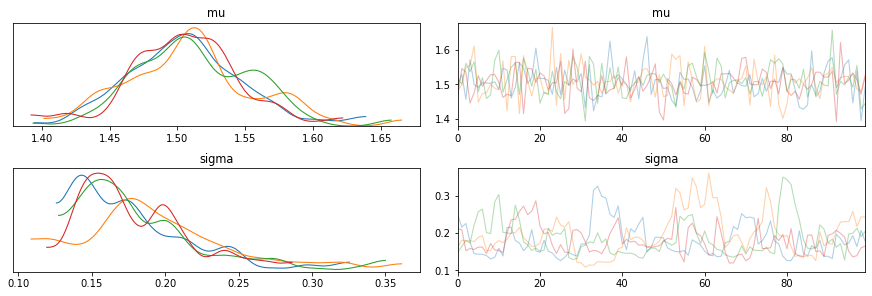

In [10]:
az.plot_trace(fit);

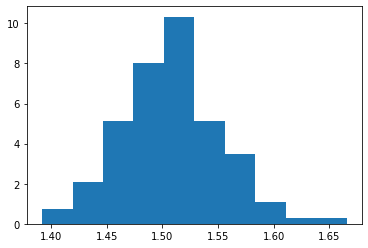

In [11]:
plt.hist(fit.to_dataframe()["mu"],density=True);

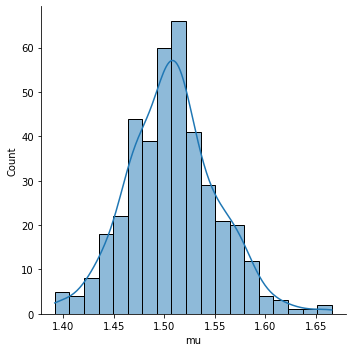

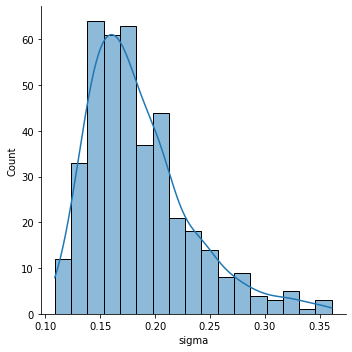

In [12]:
import seaborn as sns
sns.displot(fit.to_dataframe()["mu"],kde=True)
sns.displot(fit.to_dataframe()["sigma"],kde=True)

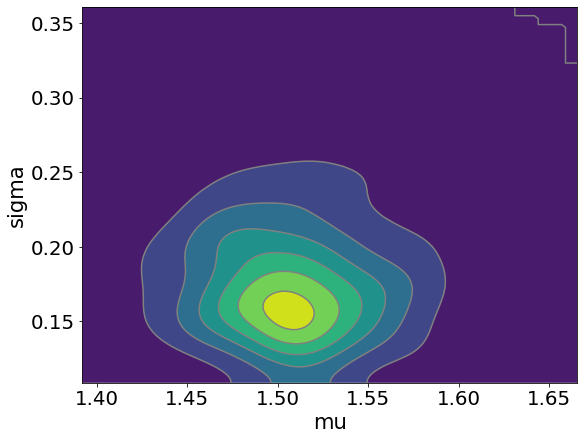

In [13]:
# az.plot_pair(data=fit.to_dataframe(),var_names=["mu","sigma"])
ax = az.plot_pair(
    fit,
    var_names=["mu", "sigma"],
    kind="kde",
    figsize=(8, 6),
)

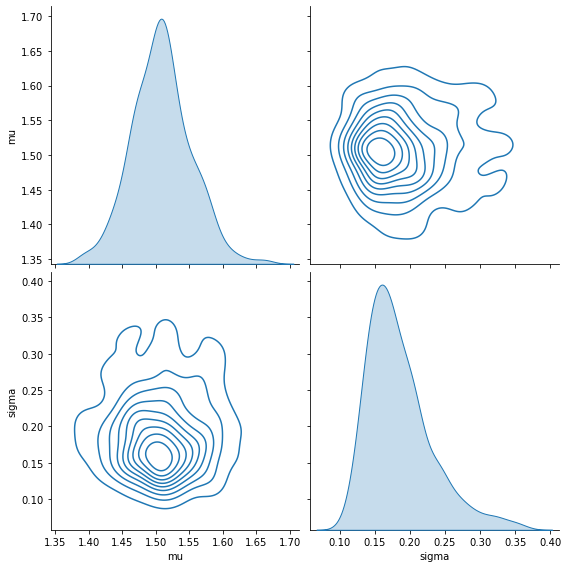

In [14]:
sns.pairplot(data=fit.to_dataframe()[["mu","sigma"]],kind="kde",diag_kind="kde",height=4);

array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

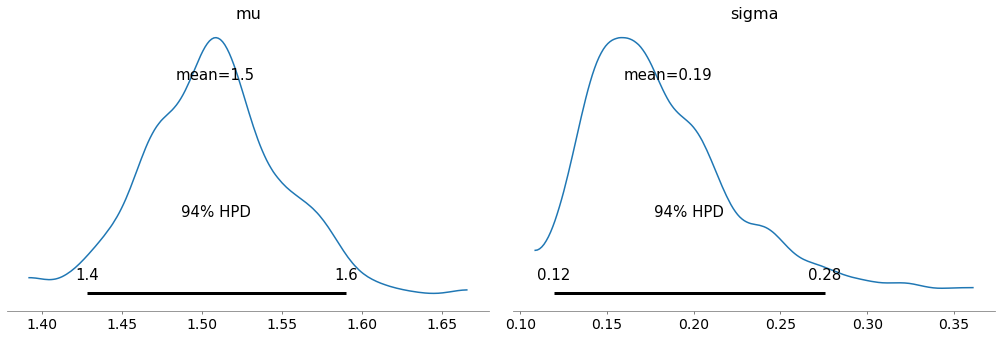

In [15]:
az.plot_posterior(fit,var_names=["mu","sigma"])

In [16]:
model_code = """
    data {
      real Y [10];
    }
    parameters {
      real mu;
      real<lower=0> sigma;
    }
    model {
      for (i in 1:10) {
            Y[i] ~ normal(mu,sigma);
        }
    mu ~ normal(1.5,0.1);
    sigma ~ gamma(1,1);
    }
    generated quantities {
        vector[10] lSimData;
        int aMax_indicator;
        int aMin_indicator;
        
        //generate posterior predictive samples  
        for (i in 1:10) {
            lSimData[i] = normal_rng(mu,sigma);
        }
        //compare with real data
        aMax_indicator = max(lSimData) > max(Y);
        aMin_indicator = min(lSimData) < min(Y);
        
    }
"""

In [17]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a930d2d090c32a9bb6ba22beac410321 NOW.


In [18]:
fit = sm.sampling(data=data,iter=200,chains=4)
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

In [19]:
df

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
mu,1.509039,0.002499,0.046999,1.418035,1.478664,1.506780,1.539792,1.606312,353.574562,1.011648
sigma,0.191030,0.007923,0.062456,0.118043,0.150177,0.176431,0.217609,0.350402,62.142218,1.126120
lSimData[1],1.517603,0.008920,0.197065,1.110709,1.398167,1.505922,1.630957,1.909470,488.026767,0.993144
lSimData[2],1.512548,0.009390,0.209372,1.107177,1.371707,1.510894,1.634494,1.963799,497.119385,1.004541
lSimData[3],1.516689,0.010231,0.212659,1.139434,1.389327,1.515542,1.635571,1.925504,432.023254,1.003251
lSimData[4],1.527453,0.011424,0.201980,1.128341,1.392971,1.521060,1.649056,1.922466,312.597306,0.993307
lSimData[5],1.484401,0.010472,0.203649,1.089007,1.358896,1.483739,1.605614,1.882118,378.152889,1.002147
lSimData[6],1.504363,0.013745,0.183665,1.144178,1.391368,1.503157,1.616334,1.845208,178.554157,1.015586
lSimData[7],1.504599,0.009900,0.202031,1.041191,1.384196,1.507429,1.648715,1.865017,416.422909,0.992307
lSimData[8],1.502926,0.010863,0.210719,1.046116,1.379147,1.512930,1.622251,1.914719,376.259359,0.992725


In [20]:
model_code = """
    functions {
        real covariateMean(real aX, real aBeta){
            return (aBeta * log(aX));
        }
    }
    data {
        int N;
        real Y[N];
        real X[N];
    }
    parameters {
      real beta;
      real<lower=0> sigma;
    }
    model {
        for (i in 1:N) {
            Y[i] ~ normal(covariateMean(X[i],beta),sigma);
        }
        beta ~ normal(0,1);
        sigma ~ gamma(1,1);
    }
"""

In [21]:
N = 100
X = np.random.normal(60,10,N)
beta = 0.3
sigma = 0.3
Y = beta * np.log(X) + np.random.normal(0,sigma,N)

In [22]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c3c26f7ab76b5a12638c7655aaf2ba93 NOW.


In [23]:
fit = sm.sampling(data=dict(Y=Y,X=X,N=N),iter=200,chains=4)
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

In [24]:
df

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
beta,0.295519,0.000385,0.006776,0.283093,0.290378,0.295936,0.300039,0.309738,310.272632,0.997221
sigma,0.277983,0.002198,0.020229,0.243022,0.263817,0.274902,0.291370,0.323520,84.692720,1.041522
lp__,77.342931,0.089671,0.977745,74.710905,77.083844,77.589084,78.003814,78.325777,118.889687,1.012122


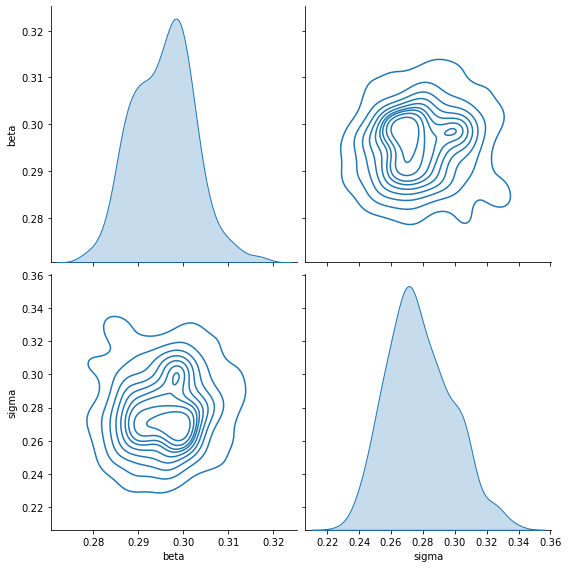

In [25]:
sns.pairplot(data=fit.to_dataframe()[["beta","sigma"]],kind="kde",diag_kind="kde",height=4);

In [26]:
print(fit)

Inference for Stan model: anon_model_c3c26f7ab76b5a12638c7655aaf2ba93.
4 chains, each with iter=200; warmup=100; thin=1; 
post-warmup draws per chain=100, total post-warmup draws=400.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta     0.3  3.8e-4 6.8e-3   0.28   0.29    0.3    0.3   0.31    310    1.0
sigma   0.28  2.2e-3   0.02   0.24   0.26   0.27   0.29   0.32     85   1.04
lp__   77.34    0.09   0.98  74.71  77.08  77.59   78.0  78.33    119   1.01

Samples were drawn using NUTS at Sat Nov 28 20:10:47 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


## 16.1 discoveries data revisited

In [5]:
raw_data = pd.read_csv("../all_data/evaluation_discoveries.csv")

In [6]:
raw_data

,time,discoveries
0,1860,5
1,1861,3
2,1862,0
3,1863,2
4,1864,0
...,...,...
95,1955,1
96,1956,0
97,1957,0
98,1958,2


In [14]:
model_code = """
    data {
        int N;
        int Y[N];
        int X[N];
    }
    parameters {
      real<lower=0> lambda;
    }
    model {
        for (i in 1:N) {
            Y[i] ~ poisson(lambda);
        }
        lambda ~ lognormal(2,1);
    }
"""

In [15]:
N = len(raw_data["discoveries"])
X = raw_data["time"]
Y = raw_data["discoveries"]

In [16]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ef7feed4a29e64b21bedeec5356197a0 NOW.


In [17]:
fit = sm.sampling(data=dict(Y=Y,X=X,N=N),warmup=500,iter=1000,chains=4,seed=1)
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

In [19]:
fit

Inference for Stan model: anon_model_ef7feed4a29e64b21bedeec5356197a0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda    3.1  6.1e-3   0.18   2.74   2.97   3.09   3.21   3.46    870    1.0
lp__    39.82    0.02   0.75  37.61  39.66  40.12   40.3  40.36   1045    1.0

Samples were drawn using NUTS at Tue Dec 29 16:34:25 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [27]:
equivalent_samples = summary_dict["summary"][:,summary_dict["summary_colnames"].index("n_eff")][0]
equivalent_samples

870.1837755779588

In [28]:
# central posterior 80% credible interval for lambda
lambda_samples = fit.extract("lambda")["lambda"]
np.percentile(lambda_samples,(10,90))

array([2.86434075, 3.32324026])

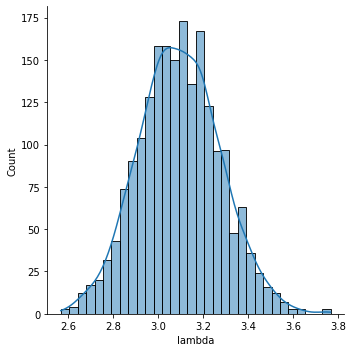

In [30]:
sns.displot(fit.to_dataframe()["lambda"],kde=True)

array([<AxesSubplot:title={'center':'lambda'}>], dtype=object)

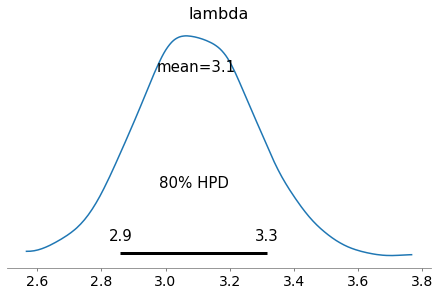

In [32]:
az.plot_posterior(fit,var_names=["lambda"],credible_interval=.8)

<AxesSubplot:>

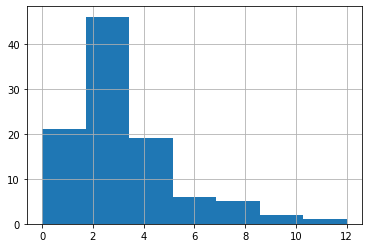

In [41]:
raw_data["discoveries"].hist(bins=7)

<AxesSubplot:xlabel='time', ylabel='discoveries'>

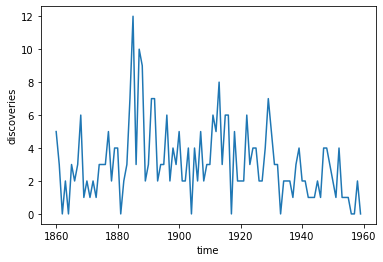

In [42]:
sns.lineplot(x="time",y="discoveries",data=raw_data)

In [67]:
model_code_update = """
    data {
        int N;
        int Y[N];
        int X[N];
    }
    parameters {
      real<lower=0> lambda;
    }
    model {
        for (i in 1:N) {
            Y[i] ~ poisson(lambda);
        }
        lambda ~ lognormal(2,1);
    }
    generated quantities{
    
        int<lower=0> XSim[N];
    
        for (i in 1:N)
            XSim[i] <- poisson_rng(lambda);
        
    }
"""

In [68]:
sm_update = StanModel(model_code=model_code_update)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_282e0869ccaf84f6af2cdd4cfd3d696d NOW.


In [69]:
fit_update = sm_update.sampling(data=dict(Y=Y,X=X,N=N),warmup=500,iter=1000,chains=4,seed=1)
summary_dict_update = fit_update.summary()
df_update = pd.DataFrame(summary_dict_update['summary'], 
                  columns=summary_dict_update['summary_colnames'], 
                  index=summary_dict_update['summary_rownames'])

In [72]:
fit_update


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_282e0869ccaf84f6af2cdd4cfd3d696d.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda     3.11  5.8e-3   0.17   2.79   2.99   3.11   3.22   3.46    881    1.0
XSim[1]    3.12    0.04   1.76    0.0    2.0    3.0    4.0    7.0   1836    1.0
XSim[2]    3.11    0.05   1.82    0.0    2.0    3.0    4.0    7.0   1551    1.0
XSim[3]     3.1    0.04   1.82    0.0    2.0    3.0    4.0    7.0   1670    1.0
XSim[4]    3.08    0.04   1.78    0.0    2.0    3.0    4.0    7.0   1859    1.0
XSim[5]    3.13    0.04   1.76    0.0    2.0    3.0    4.0    7.0   1975    1.0
XSim[6]    3.12    0.04   1.79    0.0    2.0    3.0    4.0    7.0   2105    1.0
XSim[7]    3.09    0.04   1.74    0.0    2.0    3.0    4.0    7.0   2043    1.0
XSim[8]    3.09    0.04   1.79    0.0    2.0    3.0  

In [73]:
posterior_checks = fit_update.extract("XSim")["XSim"]
posterior_checks_max = np.amax(posterior_checks, axis=1)
(posterior_checks_max >= 12).sum() / float(len(posterior_checks_max))

0.011

From the resultant histogram it is evident that our model would only very rarely produce 12
discoveries. I get 12+ discoveries in only about 1% of simulations.

In [79]:
model_negbin = """
    data {
        int N;
        int Y[N];
    }
    parameters {
      real<lower=0> mu;
      real<lower=0> kappa;
    }
    model {
        for (i in 1:N) {
            Y[i] ~ neg_binomial_2(mu, kappa);
        }
        mu ~ lognormal(2,1);
        kappa ~ lognormal(2,1);
    }
    generated quantities{
    
        int<lower=0> XSim[N];
    
        for (i in 1:N)
            XSim[i] <- neg_binomial_2_rng(mu,kappa);
        
    }    
"""

In [80]:
sm_negbin = StanModel(model_code=model_negbin)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_06424b638da847ede5b07aea99aef68b NOW.


In [81]:
fit_negbin = sm_negbin.sampling(data=dict(Y=Y,X=X,N=N),warmup=500,iter=1000,chains=4,seed=1)
summary_dict_negbin = fit_negbin.summary()
df_negbin = pd.DataFrame(summary_dict_negbin['summary'], 
                  columns=summary_dict_negbin['summary_colnames'], 
                  index=summary_dict_negbin['summary_rownames'])

In [82]:
fit_negbin


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_06424b638da847ede5b07aea99aef68b.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         3.12  6.4e-3   0.22   2.72   2.97   3.11   3.26   3.58   1183    1.0
kappa      7.06    0.15   4.23   2.96   4.62   5.95   8.18  18.08    805    1.0
XSim[1]    3.16    0.05   2.25    0.0    2.0    3.0    4.0    8.0   1958    1.0
XSim[2]    3.09    0.05   2.17    0.0    1.0    3.0    4.0    8.0   1948    1.0
XSim[3]    3.14    0.05   2.22    0.0    1.0    3.0    4.0    8.0   1898    1.0
XSim[4]    3.06    0.05   2.17    0.0    1.0    3.0    4.0    8.0   1893    1.0
XSim[5]    3.19    0.05   2.23    0.0    2.0    3.0    4.0    8.0   1934    1.0
XSim[6]    3.05    0.05    2.2    0.0    1.0    3.0    4.0    8.0   1633    1.0
XSim[7]    3.16    0.06   2.29    0.0    2.0    3.0  

In [83]:
posterior_checks_negbin = fit_negbin.extract("XSim")["XSim"]
posterior_checks_max_negbin = np.amax(posterior_checks_negbin, axis=1)
(posterior_checks_max_negbin >= 12).sum() / float(len(posterior_checks_max_negbin))

0.233

array([<AxesSubplot:title={'center':'mu'}>], dtype=object)

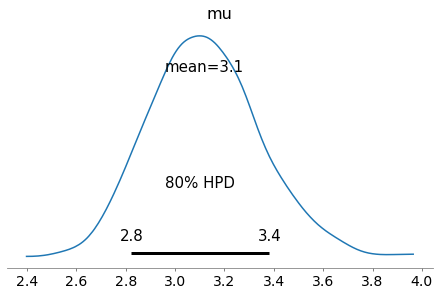

In [84]:
az.plot_posterior(fit_negbin,var_names=["mu"],credible_interval=.8)

array([[<AxesSubplot:title={'center':'mu\n0'}>,
        <AxesSubplot:title={'center':'mu\n1'}>,
        <AxesSubplot:title={'center':'mu\n2'}>,
        <AxesSubplot:title={'center':'mu\n3'}>,
        <AxesSubplot:title={'center':'kappa\n0'}>,
        <AxesSubplot:title={'center':'kappa\n1'}>,
        <AxesSubplot:title={'center':'kappa\n2'}>,
        <AxesSubplot:title={'center':'kappa\n3'}>]], dtype=object)

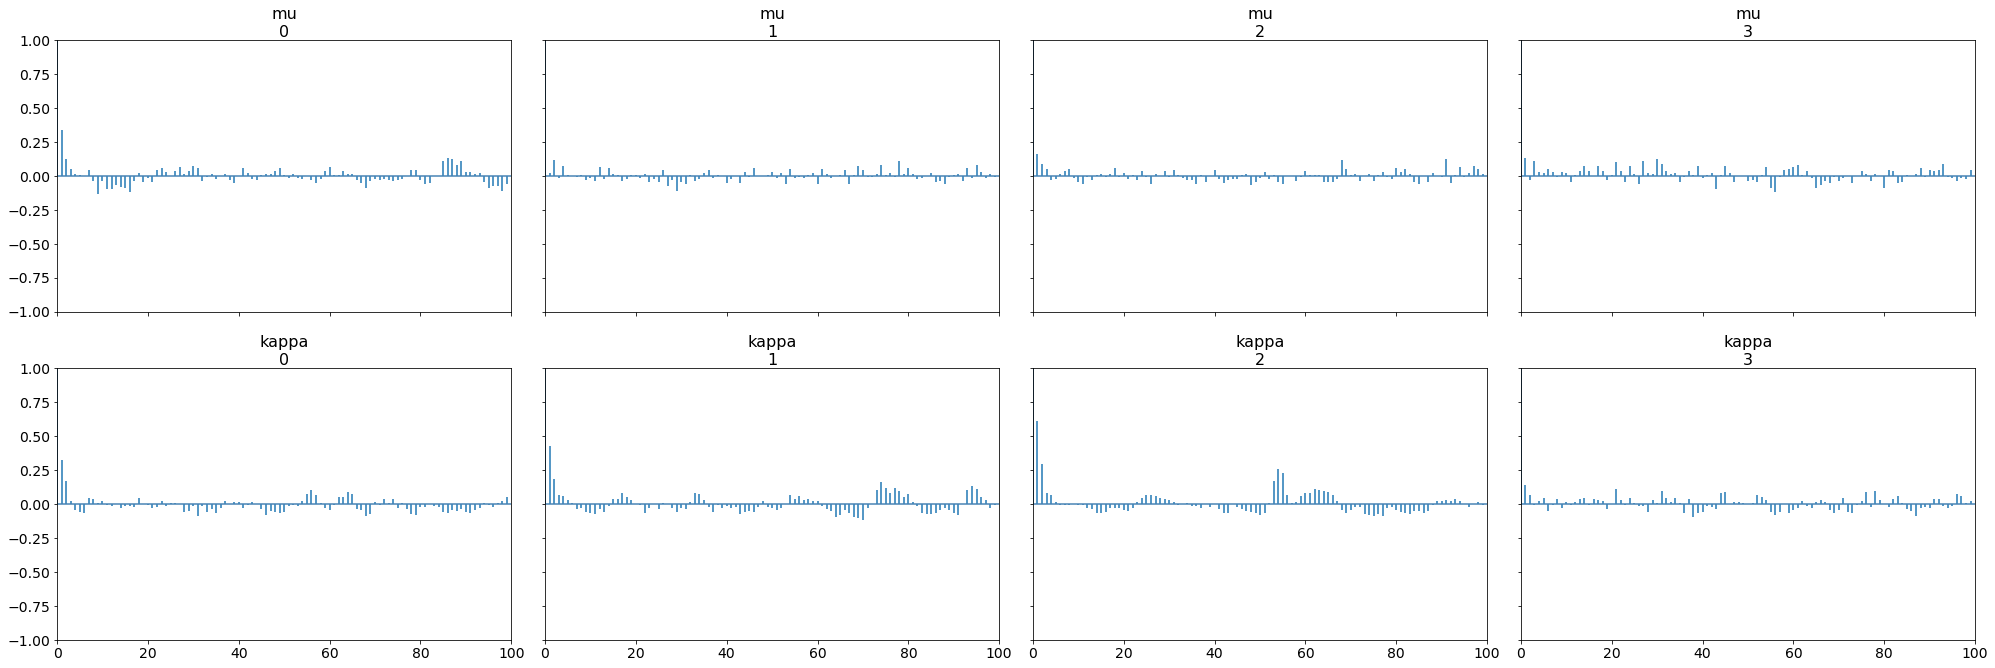

In [86]:
az.plot_autocorr(fit_negbin,var_names=("mu","kappa"))

Clearly there is some persistence in the rate of discoveries over time. In other words, discoveries
tend to clump together. This is clear from a simple time series plot of the data. One idea would
be to allow an AR1 process for the mean of the process:

mu(t) = rho*mu(t - 1) + (1 - rho)mu_bar + eta(t) (16.6)

This allows for persistence in the rate over time and might remedy some of the issues. However,
implementing it will be a bit tricky since mu(t) must always be positive. Perhaps the best thing to
do here is to use a transformed parameter exp(mu) as the mean of the distribution. This will prevent
it from being non-negative.

## 16.2 Hungover holiday regressions

In [2]:
raw_data = pd.read_csv("../all_data/stan_hangover.csv")
raw_data

,Unnamed: 0,date,volume,holiday
0,1,2012-02-05,18,0.000
1,2,2012-02-12,27,0.000
2,3,2012-02-19,22,0.000
3,4,2012-02-26,27,0.000
4,5,2012-03-04,35,0.000
...,...,...,...,...
204,205,2016-01-03,19,0.625
205,206,2016-01-10,22,0.000
206,207,2016-01-17,29,0.000
207,208,2016-01-24,39,0.000


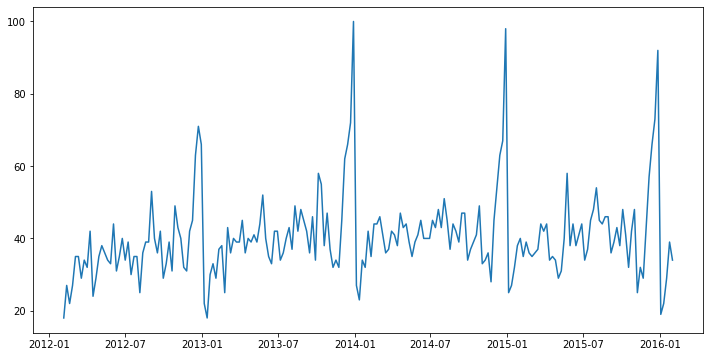

In [10]:
plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(raw_data["date"]),raw_data["volume"])

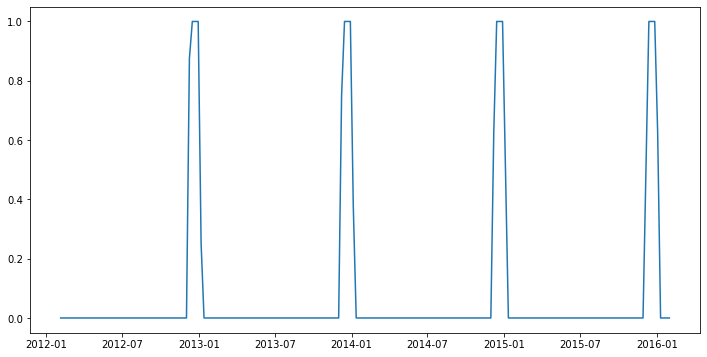

In [11]:
plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(raw_data["date"]),raw_data["holiday"])

In [19]:
model_code = """
    data {
        int T;
        real V[T];
        real h[T];
    }
    parameters {
      real beta0;
      real beta1;
      real<lower=0> sigma;
    }
    model {
        for (t in 1:T) {
            V[t] ~ normal(beta0 + beta1 * h[t], sigma);
        }
        beta0 ~ normal(0,50);
        beta1 ~ normal(0,50);
        sigma ~ normal(0,10);
    }
    generated quantities{
        real uplift;
        uplift = beta1/beta0;
    }
"""

In [20]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8841abcb79a481945db65b2d97b704c1 NOW.


In [21]:
fit = sm.sampling(
    data=dict(V=raw_data["volume"],h=raw_data["holiday"],T=len(raw_data["date"])),
    warmup=500,
    iter=1000,
    chains=4,
    seed=1)

summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

In [22]:
fit

Inference for Stan model: anon_model_8841abcb79a481945db65b2d97b704c1.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta0    38.0    0.02   0.62  36.79  37.59  38.01  38.41  39.22   1260    1.0
beta1   30.84    0.07   2.32  26.21  29.28  30.87  32.43  35.37   1193    1.0
sigma    8.66 10.0e-3   0.43   7.85   8.36   8.63   8.94   9.52   1851    1.0
uplift   0.81  2.0e-3   0.07   0.68   0.77   0.81   0.86   0.95   1106    1.0
lp__   -553.7    0.04   1.23 -556.8 -554.3 -553.4 -552.8 -552.4   1050    1.0

Samples were drawn using NUTS at Wed Dec 30 14:46:50 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

array([<AxesSubplot:title={'center':'uplift'}>], dtype=object)

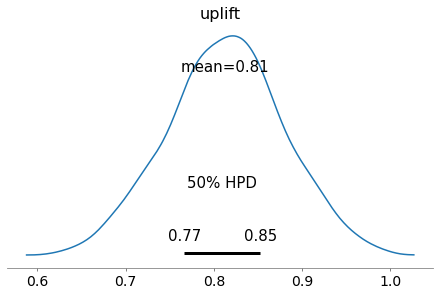

In [23]:
az.plot_posterior(fit,var_names=["uplift"],credible_interval=.5)

## 16.3 Coding up a bespoke probability density

In [51]:
df = pd.read_csv("../all_data/stan_survival.csv")
df

,Unnamed: 0,x
0,1,0.830004
1,2,0.098944
2,3,0.177928
3,4,0.091352
4,5,0.187320
...,...,...
995,996,0.749079
996,997,0.316956
997,998,0.579133
998,999,0.102046


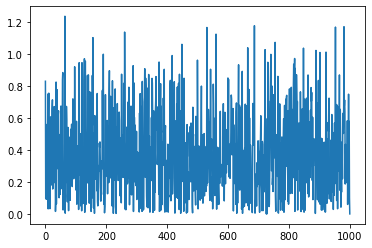

In [38]:
plt.plot(df["x"])

log p = log (b^1/3 / Gamma(4/3)) - b*y^3

In [43]:
model_code = """
    functions{
        real logProbDen(real b, real y){
            return (log(b^(1.0/3.0)) - b*y^3);
        }
    }
    data {
        int N;
        real Y[N];
    }
    parameters {
      real<lower=0> b;
    }
    model {
        for (i in 1:N) {
            target += logProbDen(b, Y[i]);
        }
    }

"""

In [44]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_999e4e4fcd03ed1e31d468215914ccea NOW.


In [52]:
fit = sm.sampling(
    data=dict(Y=df["x"],N=len(df["x"])),
    warmup=500,
    iter=1000,
    chains=4,
    seed=1)

summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

In [53]:
fit

Inference for Stan model: anon_model_999e4e4fcd03ed1e31d468215914ccea.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b      2.42  4.8e-3   0.13   2.15   2.33   2.42   2.51   2.67    790    1.0
lp__ -38.52    0.02   0.71 -40.56 -38.67 -38.23 -38.05  -38.0    971    1.0

Samples were drawn using NUTS at Wed Dec 30 15:37:42 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

array([<AxesSubplot:title={'center':'b'}>], dtype=object)

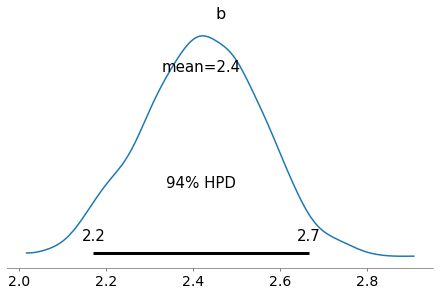

In [54]:
az.plot_posterior(fit,var_names=["b"],credible_interval=.94)

## 16.4 Is a tumour benign or malignant?

In [2]:
x = [4,18,6,4,5,6,4,6,16,7]
N = 20
nStudy = 10

In [15]:
model_code = """
    data {
        int<lower=1> nStudy;
        int<lower=1> N;
        int<lower=0,upper=N> X[nStudy];
    }
    parameters {
      ordered[2] alpha;
    }
    transformed parameters{
        real<lower=0,upper=1> theta[2];
        matrix[nStudy,2] lp;
        for (i in 1:2)
            theta[i] = inv_logit(alpha[i]);
        
        for (n in 1:nStudy)
            for (s in 1:2)
                lp[n,s] = log(0.5) + binomial_logit_lpmf(X[n] | N, alpha[s]);
    }    
    model {
        for (n in 1:nStudy)
            target += log_sum_exp(lp[n]);
    }
"""

In [16]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_44803462e6d8b29830115be7a954e07f NOW.


In [17]:
fit = sm.sampling(
    data=dict(X=x,N=N,nStudy=nStudy),
    warmup=500,
    iter=1000,
    chains=4,
    seed=1
)

summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

In [18]:
fit

Inference for Stan model: anon_model_44803462e6d8b29830115be7a954e07f.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]  -1.04  4.8e-3   0.18   -1.4  -1.16  -1.04  -0.92  -0.71   1358    1.0
alpha[2]    1.8    0.01   0.47   0.99   1.47   1.77    2.1   2.77   1393    1.0
theta[1]   0.26  9.1e-4   0.03    0.2   0.24   0.26   0.28   0.33   1363    1.0
theta[2]   0.85  1.6e-3   0.06   0.73   0.81   0.85   0.89   0.94   1217    1.0
lp[1,1]   -2.48  6.1e-3   0.23  -3.04  -2.59  -2.43   -2.3  -2.22   1375    1.0
lp[2,1]  -20.31    0.06   2.26 -25.11 -21.76 -20.17 -18.72 -16.23   1354    1.0
lp[3,1]   -2.48  4.6e-3   0.16  -2.94  -2.54  -2.42  -2.36  -2.35   1280    1.0
lp[4,1]   -2.48  6.1e-3   0.23  -3.04  -2.59  -2.43   -2.3  -2.22   1375    1.0
lp[5,1]   -2.36  2.5e-3   0.09  -2.61  -2.38  -2.32   -2.3  -2.29   1276    1.0
lp[6,1]   -2.

In [21]:
model_code = """
    data {
        int<lower=1> nStudy;
        int<lower=1> N;
        int<lower=0,upper=N> X[nStudy];
    }
    parameters {
      ordered[2] alpha;
    }
    transformed parameters{
        real<lower=0,upper=1> theta[2];
        matrix[nStudy,2] lp;
        for (i in 1:2)
            theta[i] = inv_logit(alpha[i]);
        
        for (n in 1:nStudy)
            for (s in 1:2)
                lp[n,s] = log(0.5) + binomial_logit_lpmf(X[n] | N, alpha[s]);
    }    
    model {
        for (n in 1:nStudy)
            target += log_sum_exp(lp[n]);
    }
    generated quantities {
      matrix[nStudy, 2] pstate;
      
      for (n in 1:nStudy)
          pstate[n] = exp(lp[n] - log_sum_exp(lp[n]));
    }
"""

In [22]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cf301e9c53a064353a097b0e29a6a494 NOW.


In [23]:
fit = sm.sampling(
    data=dict(X=x,N=N,nStudy=nStudy),
    warmup=500,
    iter=1000,
    chains=4,
    seed=1
)

In [24]:
fit

Inference for Stan model: anon_model_cf301e9c53a064353a097b0e29a6a494.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

               mean se_mean     sd    2.5%     25%     50%    75%  97.5%  n_eff   Rhat
alpha[1]      -1.04  4.8e-3   0.18    -1.4   -1.16   -1.04  -0.92  -0.71   1358    1.0
alpha[2]        1.8    0.01   0.47    0.99    1.47    1.77    2.1   2.77   1393    1.0
theta[1]       0.26  9.1e-4   0.03     0.2    0.24    0.26   0.28   0.33   1363    1.0
theta[2]       0.85  1.6e-3   0.06    0.73    0.81    0.85   0.89   0.94   1217    1.0
lp[1,1]       -2.48  6.1e-3   0.23   -3.04   -2.59   -2.43   -2.3  -2.22   1375    1.0
lp[2,1]      -20.31    0.06   2.26  -25.11  -21.76  -20.17 -18.72 -16.23   1354    1.0
lp[3,1]       -2.48  4.6e-3   0.16   -2.94   -2.54   -2.42  -2.36  -2.35   1280    1.0
lp[4,1]       -2.48  6.1e-3   0.23   -3.04   -2.59   -2.43   -2.3  -2.22   1375    1.0
lp[5,1]       -2.36  2.5e-3   

the rest of this question concerns creating a gibbs sampler for achieving the same results so I'm going to allow that and move on

## 16.5 How many times did I flip the coin?

In [2]:
Y = [9,7,11,10,10,9,8,11,9,11]
nStudy = 10

16.5.1: likelihood will be Binomial (multiple Bernoulli) with Bin(N,theta).

16.5.3: log(likelihood*prior) = log(likelihood) + log(prior) => log_binomial + log(0.1)

In [3]:
model_code = """
    data {
        int nStudy;
        int Y[nStudy];
    }
    
    transformed data{
        int N[10];
        for (s in 1:10)
            N[s] = 10 + s;
    }
    
    parameters {
      real<lower=0,upper=1> theta;
    }
    
    transformed parameters {
        vector[10] lp;
        for (s in 1:10)
            lp[s] = log(0.1) + binomial_lpmf(Y | N[s], theta);
    }
    
    model {
        target += log_sum_exp(lp);      
        theta ~ beta(7,2);
    }
   
    generated quantities {
        simplex[10] pState;
        pState = exp(lp - log_sum_exp(lp));
    }
"""

In [4]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_85cb5b27f023d9b54032650ad6f06e3a NOW.


In [5]:
fit = sm.sampling(
    data=dict(nStudy=nStudy,Y=Y),
    warmup=500,
    iter=1000,
    chains=4,
    seed=1
)

In [6]:
fit

Inference for Stan model: anon_model_85cb5b27f023d9b54032650ad6f06e3a.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd    2.5%      25%     50%     75%  97.5%  n_eff   Rhat
theta        0.78  3.8e-3   0.09    0.57     0.73     0.8    0.85    0.9    575   1.01
lp[1]      -22.79    0.27   6.31   -40.9   -24.07  -20.04  -18.72  -18.4    550   1.01
lp[2]      -21.57    0.15   3.78  -32.15   -22.48  -20.12  -19.16 -18.82    617   1.01
lp[3]       -23.7    0.16   4.58  -35.72   -26.02  -22.26  -20.01 -19.33    789    1.0
lp[4]       -27.9    0.29   7.74  -47.03   -32.37  -25.71   -21.4 -19.77    719    1.0
lp[5]      -33.55    0.44  11.45  -60.21    -40.9  -31.25   -23.7 -20.14    681   1.01
lp[6]       -40.3     0.6  15.32  -74.49   -50.57  -38.11  -27.44 -20.48    662   1.01
lp[7]      -47.92    0.75  19.25  -89.64    -61.1  -45.87   -32.2 -20.88    651   1.01
lp[8]      -56.25    0.91   23

array([<AxesSubplot:title={'center':'theta'}>], dtype=object)

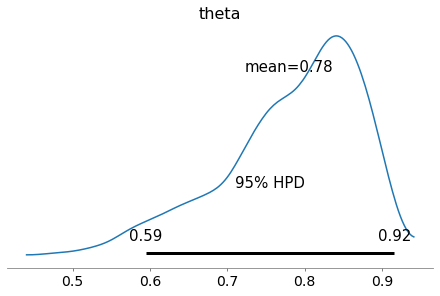

In [7]:
az.plot_posterior(fit,var_names=["theta"],credible_interval=.95)

In [11]:
df_pState= pd.DataFrame(fit.extract("pState")["pState"])
df_pState

,0,1,2,3,4,5,6,7,8,9
0,0.044199,0.626785,0.309217,1.950950e-02,2.875690e-04,1.407499e-06,2.878194e-09,2.887992e-12,1.600104e-15,5.355046e-19
1,0.968923,0.031043,0.000035,4.931923e-09,1.642395e-13,1.816137e-18,8.390465e-24,1.902073e-29,2.380920e-35,1.800218e-41
2,0.561540,0.427120,0.011302,3.824797e-05,3.023917e-08,7.938552e-12,8.707208e-16,4.686195e-20,1.392638e-24,2.499877e-29
3,0.049111,0.641854,0.291833,1.696957e-02,2.305261e-04,1.039871e-06,1.959769e-09,1.812317e-12,9.254217e-16,2.854355e-19
4,0.005482,0.296219,0.556793,1.338481e-01,7.516994e-03,1.401800e-04,1.092180e-06,4.175480e-09,8.814442e-12,1.123947e-14
...,...,...,...,...,...,...,...,...,...,...
1995,0.895364,0.104213,0.000422,2.185198e-07,2.643667e-11,1.062019e-15,1.782479e-20,1.467980e-25,6.675631e-31,1.833695e-36
1996,0.653603,0.340222,0.006161,1.426853e-05,7.720043e-09,1.386980e-12,1.041087e-16,3.834489e-21,7.798381e-26,9.579967e-31
1997,0.000633,0.095920,0.505773,3.410680e-01,5.373279e-02,2.810915e-03,6.143589e-05,6.588712e-07,3.901712e-09,1.395637e-11
1998,0.000185,0.045810,0.395301,4.362496e-01,1.124748e-01,9.629095e-03,3.444148e-04,6.044801e-06,5.858123e-08,3.429239e-10


<AxesSubplot:>

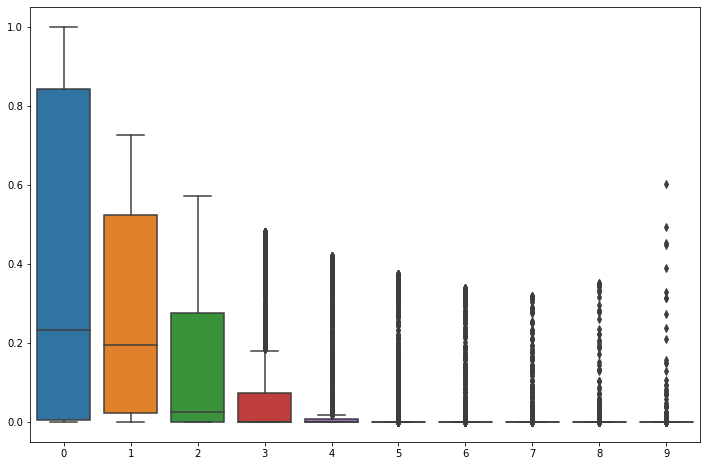

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_pState,width=.8)